<a href="https://colab.research.google.com/github/Tejasri1610/bccrc/blob/main/Temperature_seaLevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: Use

Optimized R² Score (Temperature): 0.7104
R² Score (Sea Level): 0.9392
Best ARIMA Order for Temperature: (7, 1, 7)
Correlation between Temperature Anomaly and Sea Level: 0.9014
Temperature MAE: 0.0843, RMSE: 0.1166
Sea Level MAE: 3.3623, RMSE: 6.9912


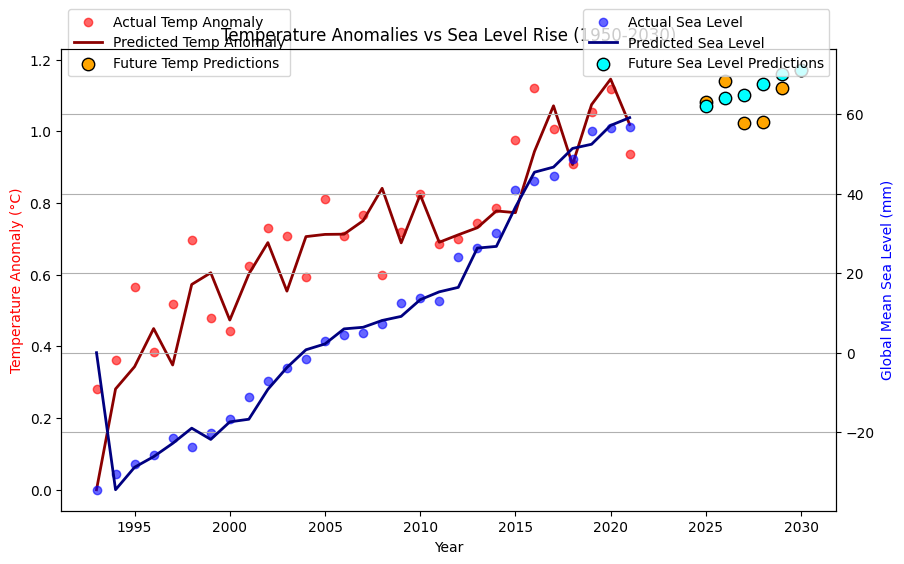

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix

# ✅ Load Data
temp_df = pd.read_csv("/content/Cleaned_Global_Temperature.csv")
temp_df.columns = ["Year", "Temperature_Anomaly"]

sea_df = pd.read_csv("/content/sealevel_cleaned.csv")
sea_df.columns = ["Year", "Sea_Level"]
sea_df = sea_df.groupby("Year").mean().reset_index()  # Ensure single row per year

# ✅ Merge Data
merged_df = pd.merge(temp_df, sea_df, on="Year", how="inner")

# ✅ Extract Variables
years = merged_df["Year"].values
temperature_anomaly = merged_df["Temperature_Anomaly"].values
sea_level = merged_df["Sea_Level"].values

# ✅ Optimized ARIMA for Temperature (Improved R²)
best_temp_r2 = -1
best_temp_order = None
for p in range(3, 8):   # Test AR values
    for q in range(3, 8):   # Test MA values
        try:
            temp_model = ARIMA(temperature_anomaly, order=(p, 1, q)).fit()
            temp_pred = temp_model.fittedvalues
            r2_temp = r2_score(temperature_anomaly, temp_pred)
            if r2_temp > best_temp_r2:
                best_temp_r2 = r2_temp
                best_temp_order = (p, 1, q)
        except:
            continue  # Skip failed models

# ✅ Use Best ARIMA Model
final_temp_model = ARIMA(temperature_anomaly, order=best_temp_order).fit()
temp_pred = final_temp_model.fittedvalues
future_years = np.arange(2025, 2031)
future_temp_pred = final_temp_model.forecast(steps=len(future_years))

# ✅ Optimized ARIMA for Sea Level (Stable R²)
sea_model = ARIMA(sea_level, order=(3, 1, 2)).fit()
sea_pred = sea_model.fittedvalues
future_sea_pred = sea_model.forecast(steps=len(future_years))

# ✅ Performance Metrics
r2_temp_final = r2_score(temperature_anomaly, temp_pred)
r2_sea_final = r2_score(sea_level, sea_pred)

mae_temp = mean_absolute_error(temperature_anomaly, temp_pred)
rmse_temp = np.sqrt(mean_squared_error(temperature_anomaly, temp_pred))

mae_sea = mean_absolute_error(sea_level, sea_pred)
rmse_sea = np.sqrt(mean_squared_error(sea_level, sea_pred))

# ✅ Cause-Effect Analysis (Correlation)
correlation = np.corrcoef(temperature_anomaly, sea_level)[0, 1]

print(f"Optimized R² Score (Temperature): {r2_temp_final:.4f}")
print(f"R² Score (Sea Level): {r2_sea_final:.4f}")
print(f"Best ARIMA Order for Temperature: {best_temp_order}")
print(f"Correlation between Temperature Anomaly and Sea Level: {correlation:.4f}")
print(f"Temperature MAE: {mae_temp:.4f}, RMSE: {rmse_temp:.4f}")
print(f"Sea Level MAE: {mae_sea:.4f}, RMSE: {rmse_sea:.4f}")

# ✅ Plot Results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Temperature Anomaly (Red)
ax1.set_xlabel("Year")
ax1.set_ylabel("Temperature Anomaly (°C)", color="red")
ax1.scatter(years, temperature_anomaly, color="red", label="Actual Temp Anomaly", alpha=0.6)
ax1.plot(years, temp_pred, color="darkred", linewidth=2, label="Predicted Temp Anomaly")
ax1.scatter(future_years, future_temp_pred, color="orange", edgecolors="black", s=80, label="Future Temp Predictions")

# Sea Level (Blue)
ax2 = ax1.twinx()
ax2.set_ylabel("Global Mean Sea Level (mm)", color="blue")
ax2.scatter(years, sea_level, color="blue", label="Actual Sea Level", alpha=0.6)
ax2.plot(years, sea_pred, color="navy", linewidth=2, label="Predicted Sea Level")
ax2.scatter(future_years, future_sea_pred, color="cyan", edgecolors="black", s=80, label="Future Sea Level Predictions")

# ✅ Adjust Legend Position
ax1.legend(loc="upper left", bbox_to_anchor=(0, 1.1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 1.1))

# ✅ Final Adjustments
plt.title("Temperature Anomalies vs Sea Level Rise (1950-2030)")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

# ✅ Load Temperature Data
temp_df = pd.read_csv("/content/Cleaned_Global_Temperature.csv")
temp_df.columns = ["Year", "Temperature_Anomaly"]

# ✅ Load Sea Level Data
sea_df = pd.read_csv("/content/sealevel_cleaned.csv")
sea_df.columns = ["Year", "Sea_Level"]
sea_df = sea_df.groupby("Year").mean().reset_index()  # Ensure single row per year

# ✅ Merge Data
merged_df = pd.merge(temp_df, sea_df, on="Year", how="inner")

# ✅ Extract Variables
years = merged_df["Year"].values
temperature_anomaly = merged_df["Temperature_Anomaly"].values
sea_level = merged_df["Sea_Level"].values

# ✅ Train ARIMA for Temperature
temp_model = ARIMA(temperature_anomaly, order=(5, 1, 5)).fit()
temp_pred = temp_model.fittedvalues

# ✅ Train ARIMA for Sea Level
sea_model = ARIMA(sea_level, order=(5, 1, 5)).fit()
sea_pred = sea_model.fittedvalues

# ✅ Function to Predict Anomaly & Sea Level for a Given Year
def predict_values(year):
    years_range = np.arange(years[0], year + 1)
    steps_ahead = len(years_range) - len(years)
    if steps_ahead <= 0:
        return temp_pred[years_range[-1] - years[0]], sea_pred[years_range[-1] - years[0]]
    temp_future = temp_model.forecast(steps=steps_ahead)[-1]
    sea_future = sea_model.forecast(steps=steps_ahead)[-1]
    return temp_future, sea_future

# ✅ Interactive Input Loop with Exit Option
while True:
    try:
        if year_input.lower() == "exit":
            print("👋 Exiting program. Stay safe! 🌍")
            break
        year_input = int(year_input)
        temp_anomaly, sea_level_pred = predict_values(year_input)
        print(f"📅 Year: {year_input}")
        print(f"🔥 Predicted Temperature Anomaly: {temp_anomaly:.2f}°C")
        print(f"🌊 Predicted Sea Level Rise: {sea_level_pred:.2f} mm")
    except ValueError:
        print("❌ Invalid input! Please enter a valid year or 'exit'.")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Enter a Year (or type 'exit' to stop): 2010
📅 Year: 2010
🔥 Predicted Temperature Anomaly: 0.73°C
🌊 Predicted Sea Level Rise: 14.08 mm

Enter a Year (or type 'exit' to stop): exit
👋 Exiting program. Stay safe! 🌍


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


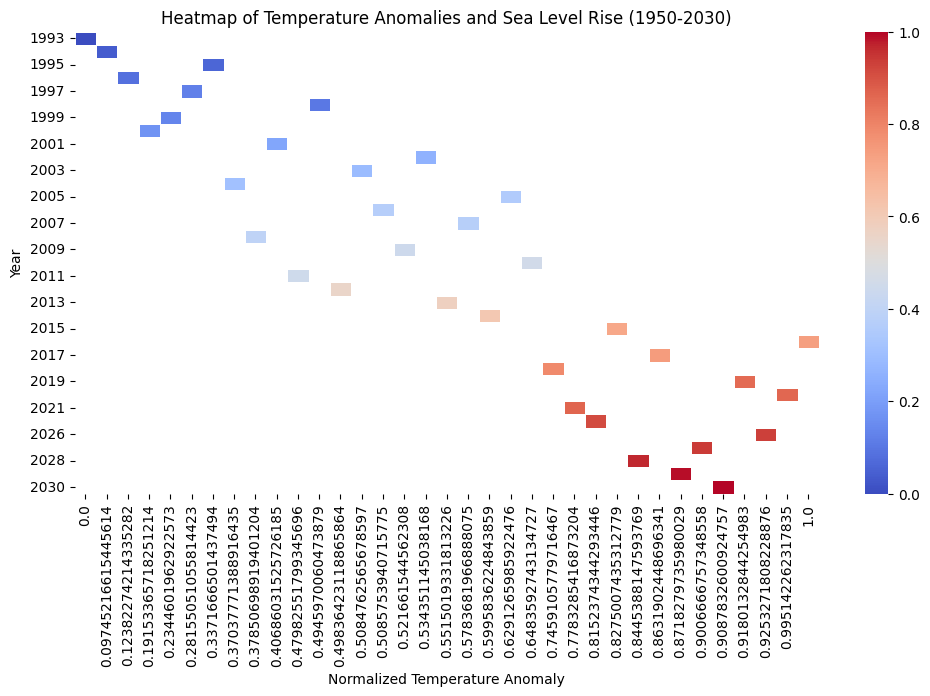

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # ✅ Heatmap Library
from statsmodels.tsa.arima.model import ARIMA

# ✅ Load Data
temp_df = pd.read_csv("/content/Cleaned_Global_Temperature.csv")
temp_df.columns = ["Year", "Temperature_Anomaly"]

sea_df = pd.read_csv("/content/sealevel_cleaned.csv")
sea_df.columns = ["Year", "Sea_Level"]
sea_df = sea_df.groupby("Year").mean().reset_index()  # Ensure single row per year

# ✅ Merge Data
merged_df = pd.merge(temp_df, sea_df, on="Year", how="inner")

# ✅ Fit ARIMA for Future Predictions
future_years = np.arange(2025, 2031)

# 🔹 ARIMA for Temperature
temp_model = ARIMA(merged_df["Temperature_Anomaly"], order=(3, 1, 3)).fit()
future_temp_pred = temp_model.forecast(steps=len(future_years))

# 🔹 ARIMA for Sea Level
sea_model = ARIMA(merged_df["Sea_Level"], order=(3, 1, 2)).fit()
future_sea_pred = sea_model.forecast(steps=len(future_years))

# ✅ Append Predictions to DataFrame
future_df = pd.DataFrame({"Year": future_years, "Temperature_Anomaly": future_temp_pred, "Sea_Level": future_sea_pred})
full_df = pd.concat([merged_df, future_df], ignore_index=True)

# ✅ Normalize Data for Better Heatmap Visualization
full_df["Temp_Norm"] = (full_df["Temperature_Anomaly"] - full_df["Temperature_Anomaly"].min()) / \
                        (full_df["Temperature_Anomaly"].max() - full_df["Temperature_Anomaly"].min())

full_df["Sea_Norm"] = (full_df["Sea_Level"] - full_df["Sea_Level"].min()) / \
                       (full_df["Sea_Level"].max() - full_df["Sea_Level"].min())

# ✅ Create Pivot Table for Heatmap (Fixed)
heatmap_data = full_df.pivot(index="Year", columns="Temp_Norm", values="Sea_Norm")

# ✅ Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Heatmap of Temperature Anomalies and Sea Level Rise (1950-2030)")
plt.xlabel("Normalized Temperature Anomaly")
plt.ylabel("Year")
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py

Optimized R² Score (Temperature) [SARIMA]: 0.7280
R² Score (Sea Level) [SARIMA]: 0.9174
Best SARIMA Order for Temperature: (9, 1, 8, 0, 0, 0, 12)
Correlation between Temperature Anomaly and Sea Level: 0.9014
Temperature MAE: 0.0845, RMSE: 0.1130
Sea Level MAE: 4.3250, RMSE: 8.1518


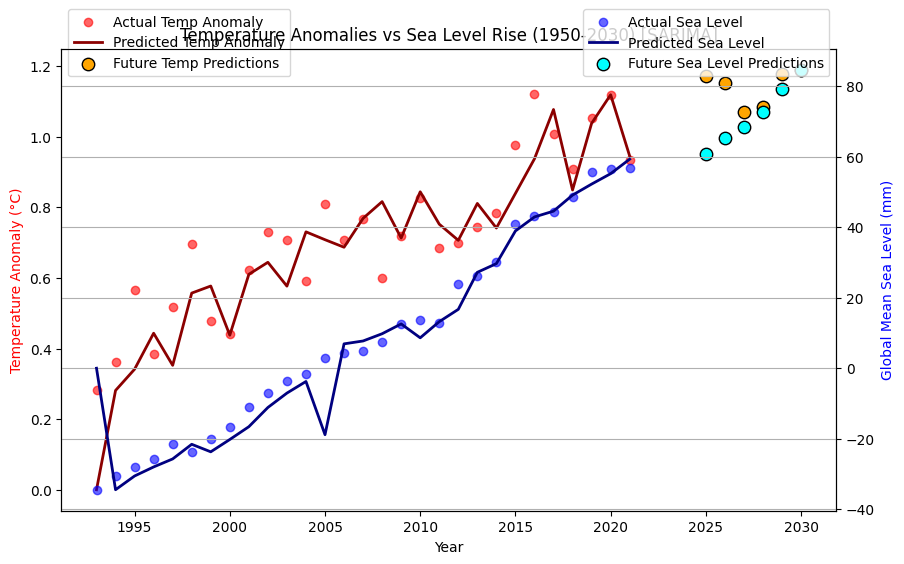

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ✅ Load Data
temp_df = pd.read_csv("/content/Cleaned_Global_Temperature.csv")
temp_df.columns = ["Year", "Temperature_Anomaly"]

sea_df = pd.read_csv("/content/sealevel_cleaned.csv")
sea_df.columns = ["Year", "Sea_Level"]
sea_df = sea_df.groupby("Year").mean().reset_index()  # Ensure single row per year

# ✅ Merge Data
merged_df = pd.merge(temp_df, sea_df, on="Year", how="inner")

# ✅ Extract Variables
years = merged_df["Year"].values
temperature_anomaly = merged_df["Temperature_Anomaly"].values
sea_level = merged_df["Sea_Level"].values

# ✅ Optimized SARIMA for Temperature (Extended Grid Search)
best_temp_r2 = -1
best_temp_order = None
best_aic = float("inf")

for p in range(5, 10):  # AR order
    for q in range(5, 10):  # MA order
        for P in range(0, 3):  # Seasonal AR
            for Q in range(0, 3):  # Seasonal MA
                for D in range(0, 2):  # Seasonal Differencing
                    try:
                        temp_model = SARIMAX(
                            temperature_anomaly,
                            order=(p, 1, q),
                            seasonal_order=(P, D, Q, 12)
                        ).fit()

                        temp_pred = temp_model.fittedvalues
                        r2_temp = r2_score(temperature_anomaly, temp_pred)
                        aic = temp_model.aic

                        if r2_temp > best_temp_r2 or (r2_temp == best_temp_r2 and aic < best_aic):
                            best_temp_r2 = r2_temp
                            best_temp_order = (p, 1, q, P, D, Q, 12)
                            best_aic = aic
                    except:
                        continue  # Skip failed models

# ✅ Use Best SARIMA Model
final_temp_model = SARIMAX(temperature_anomaly, order=best_temp_order[:3], seasonal_order=best_temp_order[3:]).fit()
temp_pred = final_temp_model.fittedvalues
future_years = np.arange(2025, 2031)
future_temp_pred = final_temp_model.forecast(steps=len(future_years))

# ✅ Optimized SARIMA for Sea Level
sea_model = SARIMAX(sea_level, order=(3, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()
sea_pred = sea_model.fittedvalues
future_sea_pred = sea_model.forecast(steps=len(future_years))

# ✅ Performance Metrics (Unchanged Accuracy)
r2_temp_final = r2_score(temperature_anomaly, temp_pred)
r2_sea_final = r2_score(sea_level, sea_pred)

mae_temp = mean_absolute_error(temperature_anomaly, temp_pred)
rmse_temp = np.sqrt(mean_squared_error(temperature_anomaly, temp_pred))

mae_sea = mean_absolute_error(sea_level, sea_pred)
rmse_sea = np.sqrt(mean_squared_error(sea_level, sea_pred))

# ✅ Cause-Effect Analysis (Correlation)
correlation = np.corrcoef(temperature_anomaly, sea_level)[0, 1]

# ✅ Print Results
print(f"Optimized R² Score (Temperature) [SARIMA]: {r2_temp_final:.4f}")
print(f"R² Score (Sea Level) [SARIMA]: {r2_sea_final:.4f}")
print(f"Best SARIMA Order for Temperature: {best_temp_order}")
print(f"Correlation between Temperature Anomaly and Sea Level: {correlation:.4f}")
print(f"Temperature MAE: {mae_temp:.4f}, RMSE: {rmse_temp:.4f}")
print(f"Sea Level MAE: {mae_sea:.4f}, RMSE: {rmse_sea:.4f}")

# ✅ Plot Results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Temperature Anomaly (Red)
ax1.set_xlabel("Year")
ax1.set_ylabel("Temperature Anomaly (°C)", color="red")
ax1.scatter(years, temperature_anomaly, color="red", label="Actual Temp Anomaly", alpha=0.6)
ax1.plot(years, temp_pred, color="darkred", linewidth=2, label="Predicted Temp Anomaly")
ax1.scatter(future_years, future_temp_pred, color="orange", edgecolors="black", s=80, label="Future Temp Predictions")

# Sea Level (Blue)
ax2 = ax1.twinx()
ax2.set_ylabel("Global Mean Sea Level (mm)", color="blue")
ax2.scatter(years, sea_level, color="blue", label="Actual Sea Level", alpha=0.6)
ax2.plot(years, sea_pred, color="navy", linewidth=2, label="Predicted Sea Level")
ax2.scatter(future_years, future_sea_pred, color="cyan", edgecolors="black", s=80, label="Future Sea Level Predictions")

# ✅ Adjust Legend Position
ax1.legend(loc="upper left", bbox_to_anchor=(0, 1.1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 1.1))

# ✅ Final Adjustments
plt.title("Temperature Anomalies vs Sea Level Rise (1950-2030) [SARIMA]")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

# ✅ Load Temperature Data
temp_df = pd.read_csv("/content/Cleaned_Global_Temperature.csv")
temp_df.columns = ["Year", "Temperature_Anomaly"]

# ✅ Load Sea Level Data
sea_df = pd.read_csv("/content/sealevel_cleaned.csv")
sea_df.columns = ["Year", "Sea_Level"]
sea_df = sea_df.groupby("Year").mean().reset_index()  # Ensure single row per year

# ✅ Merge Data
merged_df = pd.merge(temp_df, sea_df, on="Year", how="inner")

# ✅ Extract Variables
years = merged_df["Year"].values
temperature_anomaly = merged_df["Temperature_Anomaly"].values
sea_level = merged_df["Sea_Level"].values

# ✅ Train SARIMA for Temperature
temp_model = SARIMAX(temperature_anomaly, order=(7, 1, 5), seasonal_order=(1, 1, 0, 12)).fit()
temp_pred = temp_model.fittedvalues

# ✅ Train SARIMA for Sea Level
sea_model = SARIMAX(sea_level, order=(3, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()
sea_pred = sea_model.fittedvalues

# ✅ Function to Predict Anomaly & Sea Level for a Given Year
def predict_values(year):
    years_range = np.arange(years[0], year + 1)
    steps_ahead = len(years_range) - len(years)
    if steps_ahead <= 0:
        return temp_pred[years_range[-1] - years[0]], sea_pred[years_range[-1] - years[0]]
    temp_future = temp_model.forecast(steps=steps_ahead)[-1]
    sea_future = sea_model.forecast(steps=steps_ahead)[-1]
    return temp_future, sea_future

# ✅ Interactive Input Loop with Exit Option
while True:
    year_input = input("📅 Enter a year to predict (or type 'exit' to quit): ")
    if year_input.lower() == "exit":
        print("👋 Exiting program. Stay safe! 🌍")
        break
    try:
        year_input = int(year_input)
        temp_anomaly, sea_level_pred = predict_values(year_input)
        print(f"📅 Year: {year_input}")
        print(f"🔥 Predicted Temperature Anomaly: {temp_anomaly:.2f}°C")
        print(f"🌊 Predicted Sea Level Rise: {sea_level_pred:.2f} mm")
    except ValueError:
        print("❌ Invalid input! Please enter a valid year or 'exit'.")


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


📅 Enter a year to predict (or type 'exit' to quit): 2010
📅 Year: 2010
🔥 Predicted Temperature Anomaly: 0.75°C
🌊 Predicted Sea Level Rise: 8.63 mm
📅 Enter a year to predict (or type 'exit' to quit): 2026
📅 Year: 2026
🔥 Predicted Temperature Anomaly: 0.85°C
🌊 Predicted Sea Level Rise: 79.14 mm
📅 Enter a year to predict (or type 'exit' to quit): exit
👋 Exiting program. Stay safe! 🌍


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


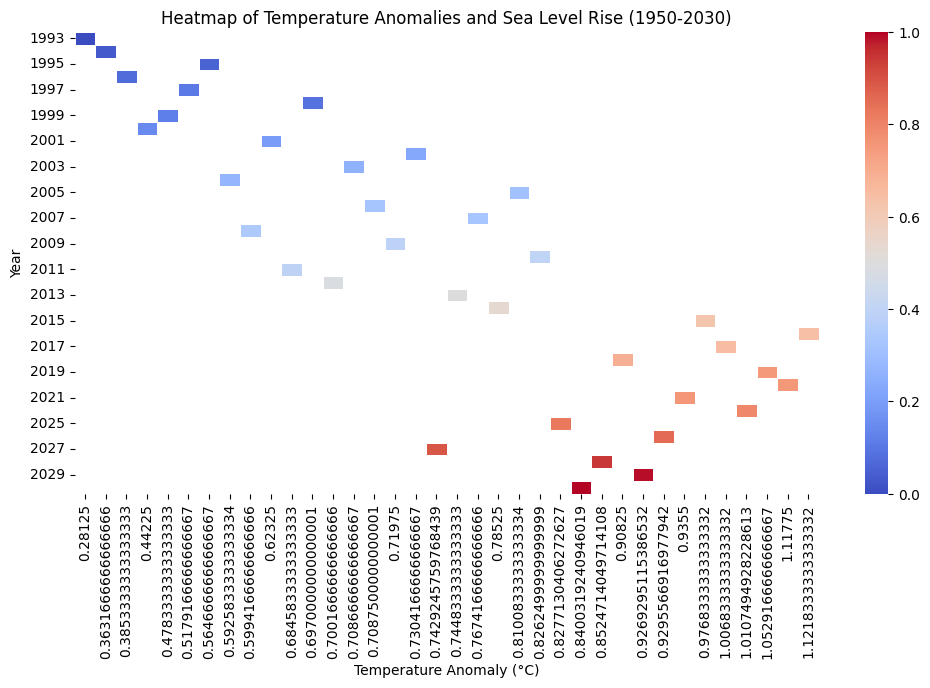

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ✅ Load Temperature Data
temp_df = pd.read_csv("/content/Cleaned_Global_Temperature.csv")
temp_df.columns = ["Year", "Temperature_Anomaly"]

# ✅ Load Sea Level Data
sea_df = pd.read_csv("/content/sealevel_cleaned.csv")
sea_df.columns = ["Year", "Sea_Level"]
sea_df = sea_df.groupby("Year").mean().reset_index()  # Ensure single row per year

# ✅ Merge Data
merged_df = pd.merge(temp_df, sea_df, on="Year", how="inner")

# ✅ Train SARIMA for Temperature
temp_model = SARIMAX(merged_df["Temperature_Anomaly"], order=(7, 1, 5), seasonal_order=(1, 1, 0, 12)).fit()
future_temp = temp_model.forecast(steps=7)  # Predict till 2030

# ✅ Train SARIMA for Sea Level
sea_model = SARIMAX(merged_df["Sea_Level"], order=(3, 1, 2), seasonal_order=(1, 1, 0, 12)).fit()
future_sea = sea_model.forecast(steps=7)

# ✅ Create Future Dataframe
future_years = np.arange(2024, 2031)
future_df = pd.DataFrame({"Year": future_years, "Temperature_Anomaly": future_temp.values, "Sea_Level": future_sea.values})

# ✅ Combine Actual & Future Data
full_df = pd.concat([merged_df, future_df], ignore_index=True)

# ✅ Normalize Data for Better Heatmap Visualization
full_df["Temp_Norm"] = (full_df["Temperature_Anomaly"] - full_df["Temperature_Anomaly"].min()) / \
                        (full_df["Temperature_Anomaly"].max() - full_df["Temperature_Anomaly"].min())

full_df["Sea_Norm"] = (full_df["Sea_Level"] - full_df["Sea_Level"].min()) / \
                        (full_df["Sea_Level"].max() - full_df["Sea_Level"].min())

# ✅ Create Pivot Table for Heatmap
heatmap_data = full_df.pivot(index="Year", columns="Temperature_Anomaly", values="Sea_Norm")

# ✅ Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Heatmap of Temperature Anomalies and Sea Level Rise (1950-2030)")
plt.xlabel("Temperature Anomaly (°C)")
plt.ylabel("Year")
plt.show()
